This notebook will show the methods of rebining, and the process of chosing the best `v` for rebining.

In [1]:
%matplotlib notebook
from dla_cnn.desi.DesiMock import DesiMock
from dla_cnn.desi.preprocess import rebin
from dla_cnn.data_model.Sightline import Sightline
from os.path import join
from matplotlib import pyplot as plt
import numpy as np

In [2]:
file_num = [705,706,711,718,723,731,735,743,747,748,761,773,777,785,789,791]
path = '/Users/zjq/7'
file_path = join(path,str(file_num[0]))
spectra = join(file_path,"spectra-16-%s.fits"%file_num[0])
truth = join(file_path,"truth-16-%s.fits"%file_num[0])
zbest = join(file_path,"zbest-16-%s.fits"%file_num[0])#generate file path

In [3]:
spec = DesiMock()
spec.read_fits_file(spectra,truth,zbest)

In [4]:
data = spec.data

In [5]:
spec_id = list(data.keys())
spec_id

[120129026,
 120129166,
 120129167,
 120129170,
 120129317,
 120129320,
 120129633,
 120129789,
 120129791,
 120129952,
 120130406,
 120130410,
 120131131,
 120131548,
 120131549,
 120131999,
 120132002,
 120132301,
 120132583,
 120133295,
 120133544,
 120133545,
 120133688,
 120133813,
 120133817,
 120134072,
 120134073,
 120134427,
 120134681,
 120134683,
 120134823,
 120135183,
 120135186,
 120135309,
 120136049,
 120136520,
 120136524,
 120136636,
 120136871,
 120136997,
 120137207,
 120137413,
 120137930,
 120137931,
 120138033,
 120138800,
 120138801,
 120138802,
 120139437,
 120139726,
 120139918,
 120139921,
 120140103,
 120140105,
 120140579,
 120141517,
 120141587,
 120141941,
 120141943,
 120142887,
 120142889,
 120142897,
 120143345,
 120143352,
 120143571,
 120143577,
 120143579,
 120143582,
 120143585,
 120143804,
 120143805,
 120143806,
 120143807,
 120143815,
 120143816,
 120144027,
 120144028,
 120144030,
 120144034,
 120144042,
 120144250,
 120144260,
 120144475,
 120

### The methods of rebining

1447


<IPython.core.display.Javascript object>


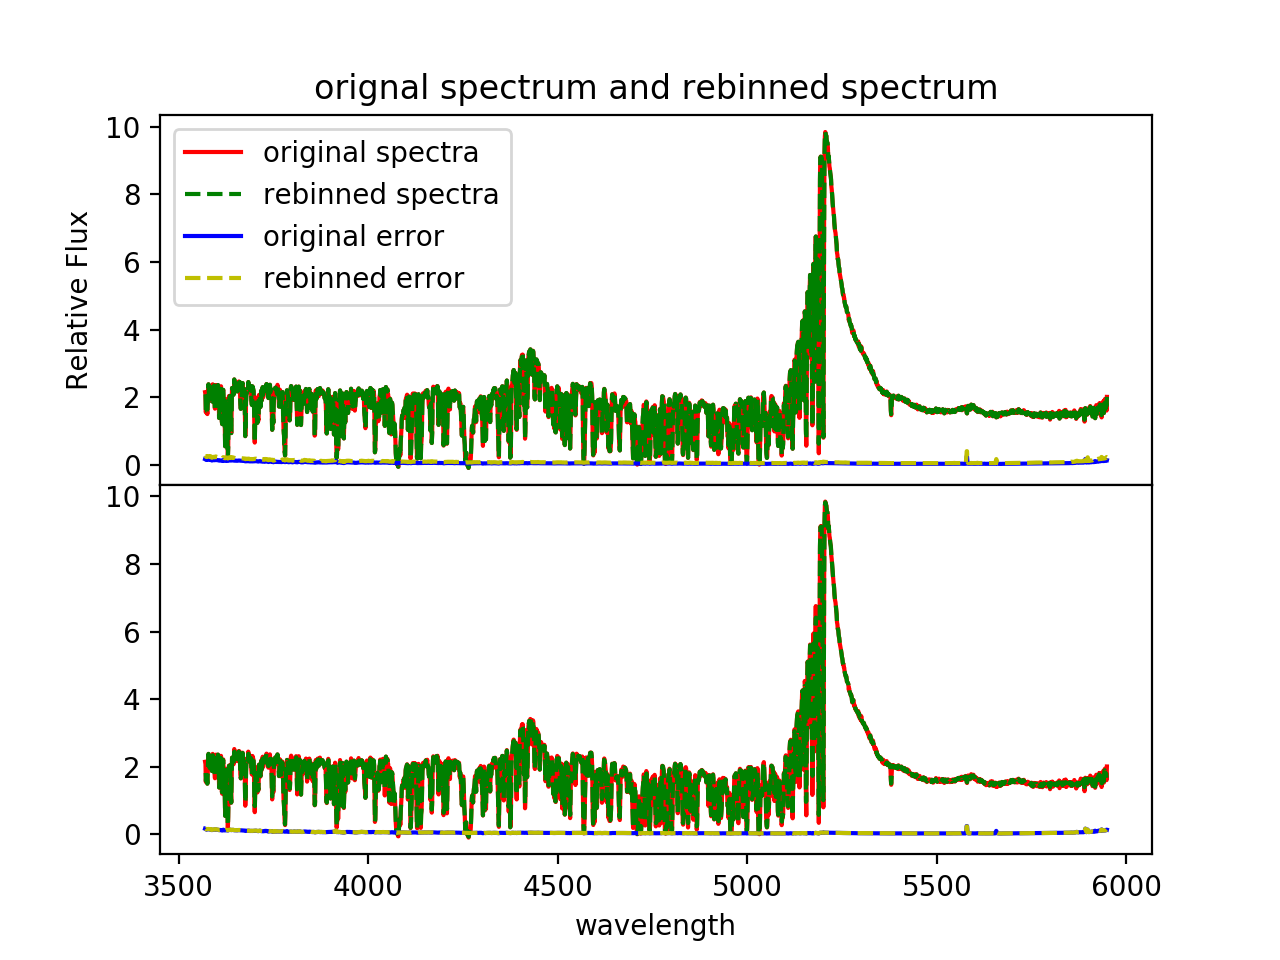

In [6]:
# Show the two methods of rebinning the spectra and draw the spectra for each method.

sightline = spec.get_sightline(spec_id[0], camera= 'b')

wavelength = 10**sightline.loglam
flux = sightline.flux
error = sightline.error

rebin(sightline, v = 40000)#directly invoke _rebin

new_wavelength = 10**sightline.loglam
new_flux = sightline.flux
new_error = sightline.error

print(len(new_wavelength)-len(wavelength))

fig,axs = plt.subplots(2,1,sharex = True, sharey= True)

axs[0].plot(wavelength, flux, 'r',label = 'original spectra')
axs[0].plot(new_wavelength, new_flux, 'g--', label = 'rebinned spectra')
axs[0].plot(wavelength,error,'b',label = 'original error')
axs[0].plot(new_wavelength,new_error,'y--',label = 'rebinned error')
axs[0].legend(loc = 'best')

orignal_sightline = spec.get_sightline(spec_id[0], camera= 'b')
rebinned_sightline = spec.get_sightline(spec_id[0],camera= 'b', rebin = True)
#one can also rebin the spectra using the parameter 'v'(int) in function DesiMock.get_sightline.
axs[1].plot(10**orignal_sightline.loglam, orignal_sightline.flux, 'r',label = 'original spectra')
axs[1].plot(10**rebinned_sightline.loglam, rebinned_sightline.flux, 'g--', label = 'rebinned spectra')
axs[1].plot(10**orignal_sightline.loglam, orignal_sightline.error,'b',label = 'original error')
axs[1].plot(10**rebinned_sightline.loglam, rebinned_sightline.error,'y--',label = 'rebinned error')
axs[0].set(**{'title':'orignal spectrum and rebinned spectrum', 'ylabel':'Relative Flux'})
axs[1].set(**{'xlabel':'wavelength'})
plt.subplots_adjust(wspace=0,hspace=0)

### Determine the best $\frac{\delta\lambda}{\lambda}$ for each channel.

In [7]:
#for 'b' channel
c = 2.9979246e8
best_v = {}
sightline = spec.get_sightline(spec_id[0], camera= 'b')
wavelength = 10**sightline.loglam
dlambda = (wavelength - np.roll(wavelength,1))[1:]
print(wavelength)
dlnlambda = np.array(dlambda/wavelength[1:])
v = c*(np.exp(dlnlambda)-1)
vm = np.median(v)
best_v['b'] = int(vm)

[3569.39990234 3570.39990234 3571.39990234 ... 5946.39990234 5947.39990234
 5948.39990234]


In [8]:
#for 'r' channel
sightline = spec.get_sightline(spec_id[0], camera= 'r')
wavelength = 10**sightline.loglam
dlambda = (wavelength - np.roll(wavelength,1))[1:]
print(wavelength)
dlnlambda = np.array(dlambda/wavelength[1:])
v = c*(np.exp(dlnlambda)-1)
vm = np.median(v)
best_v['r'] = int(vm)

[5625.39990234 5626.39990234 5627.39990234 ... 7738.39990234 7739.39990234
 7740.39990234]


In [10]:
#for 'z' channel
sightline = spec.get_sightline(spec_id[0], camera= 'z')
wavelength = 10**sightline.loglam
dlambda = (wavelength - np.roll(wavelength,1))[1:]
print(wavelength)
dlnlambda = np.array(dlambda/wavelength[1:])
v = c*(np.exp(dlnlambda)-1)
vm = np.median(v)
best_v['z'] = int(vm)

[7435.39990234 7436.39990234 7437.39990234 ... 9831.40039062 9832.40039062
 9833.40039063]


In [11]:
print(best_v)

{'b': 62996, 'r': 44859, 'z': 34720}


<IPython.core.display.Javascript object>


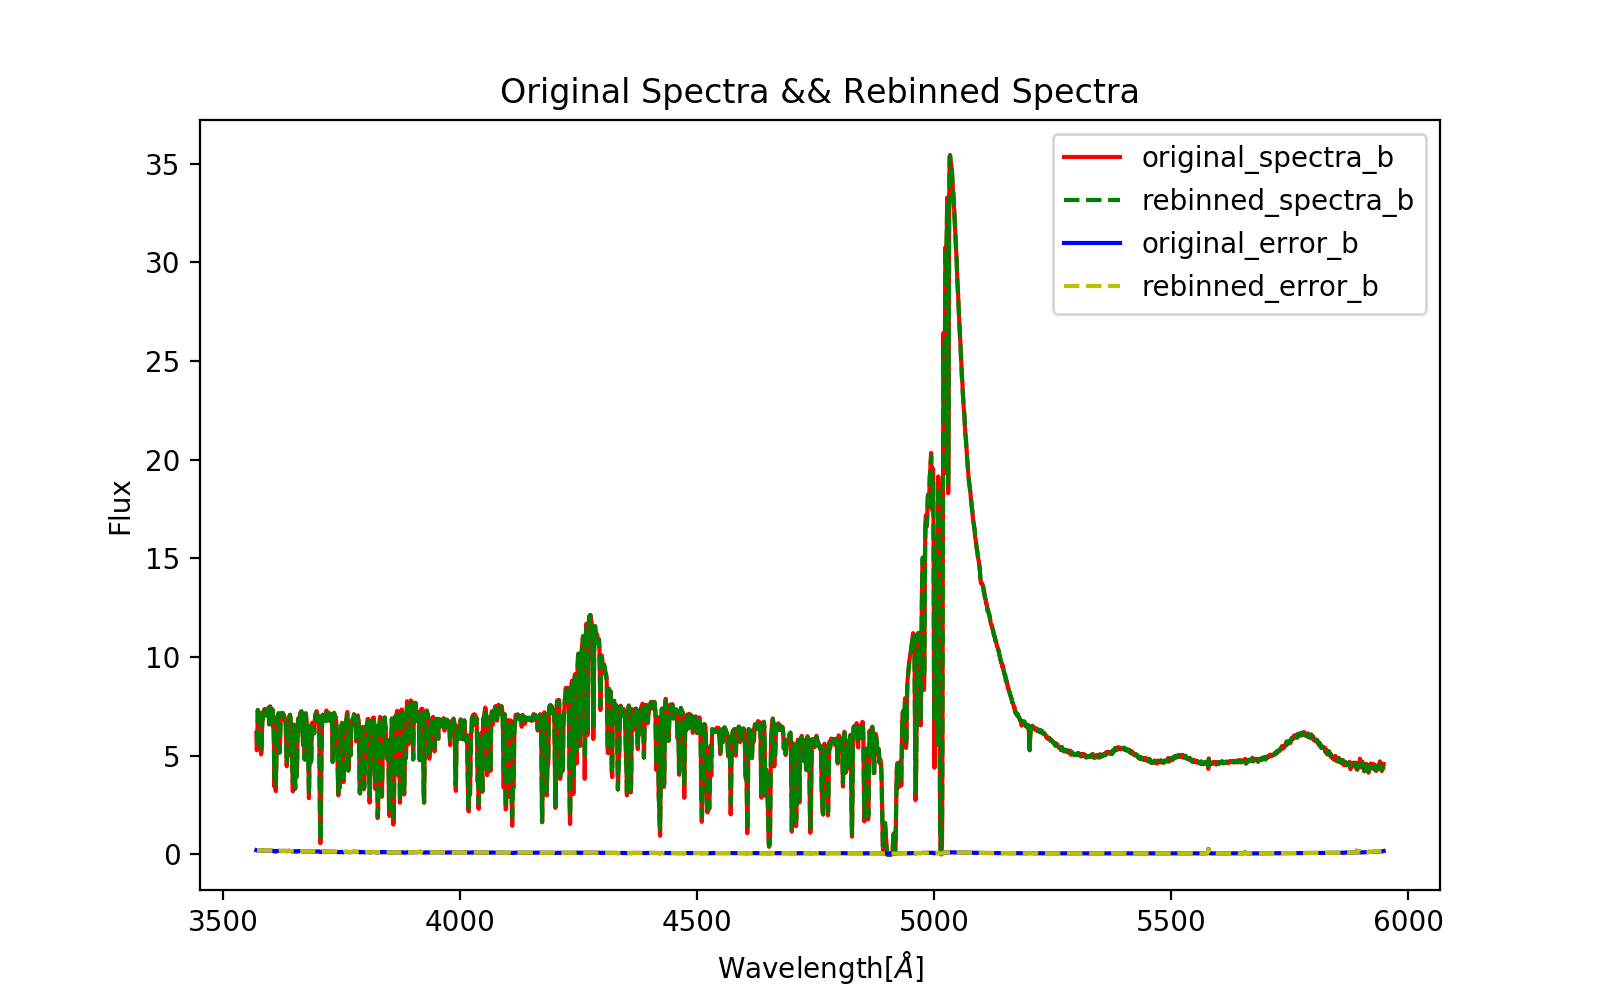

In [14]:
rbsightline = spec.get_sightline(spec_id[1],camera='b',rebin = True)
bsightline = spec.get_sightline(spec_id[1],camera='b')

rrsightline = spec.get_sightline(spec_id[1],camera='r',rebin = True)
rsightline = spec.get_sightline(spec_id[1],camera='r')

rzsightline = spec.get_sightline(spec_id[1],camera='z',rebin = True)
zsightline = spec.get_sightline(spec_id[1],camera='z')


plt.figure(figsize=(8,5))
plt.xlabel('Wavelength'+'['+'$\AA$'+']',fontsize=10)
plt.ylabel('Flux',fontsize=10)
plt.title('Original Spectra && Rebinned Spectra')
plt.plot(10**bsightline.loglam, bsightline.flux, 'r',label = 'original_spectra_b')
plt.plot(10**rbsightline.loglam, rbsightline.flux, 'g--', label = 'rebinned_spectra_b')
plt.plot(10**bsightline.loglam, bsightline.error,'b',label = 'original_error_b')
plt.plot(10**rbsightline.loglam, rbsightline.error,'y--',label = 'rebinned_error_b')
plt.legend(loc = 'best')

#axes[1].plot(10**rsightline.loglam, rsightline.flux, 'r',label = 'original_spectra_r')
#axes[1].plot(10**rrsightline.loglam, rrsightline.flux, 'g--', label = 'rebinned_spectra_r')
#axes[1].plot(10**rsightline.loglam, rsightline.error,'b',label = 'original_error_r')
#axes[1].plot(10**rrsightline.loglam, rrsightline.error,'y--',label = 'rebinned_error_r')

#axes[2].plot(10**zsightline.loglam, zsightline.flux, 'r',label = 'original_spectra_z')
#axes[2].plot(10**rzsightline.loglam, rzsightline.flux, 'g--', label = 'rebinned_spectra_z')
#axes[2].plot(10**zsightline.loglam, zsightline.error,'b',label = 'original_error_z')
#axes[2].plot(10**rzsightline.loglam, rzsightline.error,'y--',label = 'rebinned_error_z')

In [13]:
print(best_v)

{'b': 62996, 'r': 44859, 'z': 34720}
